# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

from dotenv import load_dotenv
load_dotenv("example.env")
!cd

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KetanHina\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


C:\Users\KetanHina\study\cu-nyc-fin-pt-12-2020-u-c\02-Homework\12-NLP\Instructions\Starter_Code


In [2]:
# Read your api key environment variable
api_key = os.getenv("news_api")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_news_en = newsapi.get_everything(
    q="bitcoin AND crypto",
    language="en"
)

# Show the total number of news
bitcoin_news_en["totalResults"]

3202

In [93]:
# bitcoin_news_en['articles'][0]['content']

In [9]:
# Fetch the Ethereum news articles
ethereum_news_en = newsapi.get_everything(
    q="ethereum AND crypto",
    language="en"
)

# Show the total number of news
ethereum_news_en["totalResults"]
ethereum_news_en['articles'][0]

{'source': {'id': 'the-verge', 'name': 'The Verge'},
 'author': 'Justine Calma',
 'title': 'The climate controversy swirling around NFTs',
 'description': 'Most NFTs are bought and sold with Ethereum, a cryptocurrency that guzzles up energy and pumps out a lot of greenhouse gas emissions. Artists are fighting over whether there can be a more sustainable future for crypto art.',
 'url': 'https://www.theverge.com/2021/3/15/22328203/nft-cryptoart-ethereum-blockchain-climate-change',
 'urlToImage': 'https://cdn.vox-cdn.com/thumbor/pYrvxU6TUFVYkAwb6h1U4BPYMj0=/0x431:6000x3572/fit-in/1200x630/cdn.vox-cdn.com/uploads/chorus_asset/file/22366636/1230723200.jpg',
 'publishedAt': '2021-03-15T13:51:11Z',
 'content': 'Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars]'}

In [11]:
# Function to create the datframe from articles 
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)


In [12]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_en_df = create_df(bitcoin_news_en["articles"], "en")
bitcoin_en_df.head()

,title,description,text,date,language
0,"NFTs don’t need crypto, but crypto needs NFTs",Spending millions for a digital work of art th...,Spending millions for a digital work of art th...,2021-03-13,en
1,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,en
2,Coinbase fined $6.5 million over cryptocurrenc...,Regulators have fined Coinbase $6.5 million fo...,Coinbase is paying the price for its earlier c...,2021-03-21,en
3,Crypto social network BitClout arrives with a ...,While much of the recent wave of relentless hy...,While much of the recent wave of relentless hy...,2021-03-23,en
4,Bitfinex launches cryptocurrency payment gatew...,Cryptocurrency exchange company Bitfinex is la...,Cryptocurrency exchange company Bitfinex is la...,2021-03-04,en


In [13]:
# Create the Ethereum sentiment scores DataFrame
ethereum_en_df = create_df(ethereum_news_en["articles"], "en")
ethereum_en_df.head()

,title,description,text,date,language
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,en
1,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,en
2,$5.7M stolen in Roll crypto heist after hot wa...,A security breach at cryptocurrency platform R...,A security breach at cryptocurrency platform R...,2021-03-16,en
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,en
4,"NFTs don’t need crypto, but crypto needs NFTs",Spending millions for a digital work of art th...,Spending millions for a digital work of art th...,2021-03-13,en


In [14]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return result

In [15]:
# Sentiment scores dictionaries
title_sent = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in bitcoin_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment = analyzer.polarity_scores(row["title"])
        title_sent["title_compound"].append(title_sentiment["compound"])
        title_sent["title_pos"].append(title_sentiment["pos"])
        title_sent["title_neu"].append(title_sentiment["neu"])
        title_sent["title_neg"].append(title_sentiment["neg"])
        title_sent["title_sent"].append(get_sentiment(title_sentiment["compound"]))

        text_sentiment = analyzer.polarity_scores(row["text"])
        text_sent["text_compound"].append(text_sentiment["compound"])
        text_sent["text_pos"].append(text_sentiment["pos"])
        text_sent["text_neu"].append(text_sentiment["neu"])
        text_sent["text_neg"].append(text_sentiment["neg"])
        text_sent["text_sent"].append(get_sentiment(text_sentiment["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_df = pd.DataFrame(title_sent)
text_sentiment_df = pd.DataFrame(text_sent)
bitcoin_en_df_2 = bitcoin_en_df.join(title_sentiment_df).join(text_sentiment_df)

display(bitcoin_en_df_2.head())
bitcoin_en_df_2.describe()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,"NFTs don’t need crypto, but crypto needs NFTs",Spending millions for a digital work of art th...,Spending millions for a digital work of art th...,2021-03-13,en,0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
1,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,en,0.0000,0.0,1.000,0.000,0,0.4404,0.091,0.909,0.000,1
2,Coinbase fined $6.5 million over cryptocurrenc...,Regulators have fined Coinbase $6.5 million fo...,Coinbase is paying the price for its earlier c...,2021-03-21,en,0.0000,0.0,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
3,Crypto social network BitClout arrives with a ...,While much of the recent wave of relentless hy...,While much of the recent wave of relentless hy...,2021-03-23,en,-0.1027,0.0,0.896,0.104,-1,0.0516,0.036,0.964,0.000,1
4,Bitfinex launches cryptocurrency payment gatew...,Cryptocurrency exchange company Bitfinex is la...,Cryptocurrency exchange company Bitfinex is la...,2021-03-04,en,0.0000,0.0,1.000,0.000,0,0.2960,0.090,0.862,0.048,1


,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,-0.002900,0.026200,0.939100,0.034700,-0.050000,0.269415,0.065800,0.929450,0.004750,0.65000
std,0.223369,0.080642,0.115782,0.093896,0.510418,0.258000,0.078262,0.082872,0.014621,0.48936
min,-0.521600,0.000000,0.647000,0.000000,-1.000000,0.000000,0.000000,0.660000,0.000000,0.00000
25%,0.000000,0.000000,0.974000,0.000000,0.000000,0.000000,0.000000,0.914250,0.000000,0.00000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.307100,0.076000,0.924000,0.000000,1.00000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.440400,0.085500,1.000000,0.000000,1.00000
max,0.493900,0.262000,1.000000,0.353000,1.000000,0.908000,0.340000,1.000000,0.048000,1.00000


<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

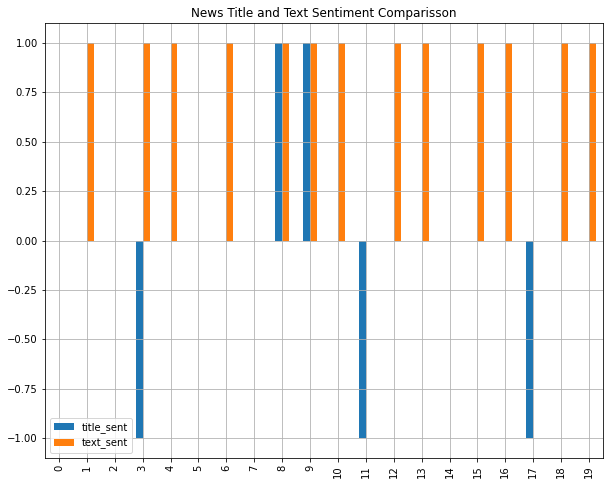

In [16]:
# Describe the Bitcoin Sentiment
bitcoin_en_df_2.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)


In [17]:
# Describe the Ethereum Sentiment
# Sentiment scores dictionaries for Ethereum 
title_sent_eth = {
    "title_compound": [],
    "title_pos": [],
    "title_neu": [],
    "title_neg": [],
    "title_sent": [],
}
text_sent_eth = {
    "text_compound": [],
    "text_pos": [],
    "text_neu": [],
    "text_neg": [],
    "text_sent": [],
}

# Get sentiment for the text and the title
for index, row in ethereum_en_df.iterrows():
    try:
        # Sentiment scoring with VADER
        title_sentiment_eth = analyzer.polarity_scores(row["title"])
        title_sent_eth["title_compound"].append(title_sentiment_eth["compound"])
        title_sent_eth["title_pos"].append(title_sentiment_eth["pos"])
        title_sent_eth["title_neu"].append(title_sentiment_eth["neu"])
        title_sent_eth["title_neg"].append(title_sentiment_eth["neg"])
        title_sent_eth["title_sent"].append(get_sentiment(title_sentiment_eth["compound"]))

        text_sentiment_eth = analyzer.polarity_scores(row["text"])
        text_sent_eth["text_compound"].append(text_sentiment_eth["compound"])
        text_sent_eth["text_pos"].append(text_sentiment_eth["pos"])
        text_sent_eth["text_neu"].append(text_sentiment_eth["neu"])
        text_sent_eth["text_neg"].append(text_sentiment_eth["neg"])
        text_sent_eth["text_sent"].append(get_sentiment(text_sentiment_eth["compound"]))
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame
title_sentiment_eth_df = pd.DataFrame(title_sent_eth)
text_sentiment_eth_df = pd.DataFrame(text_sent_eth)
ethereum_en_df_2 = ethereum_en_df.join(title_sentiment_eth_df).join(text_sentiment_eth_df)

display(ethereum_en_df_2.head())

ethereum_en_df_2.describe()

,title,description,text,date,language,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0
1,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,en,0.0000,0.000,1.000,0.000,0,0.4404,0.091,0.909,0.000,1
2,$5.7M stolen in Roll crypto heist after hot wa...,A security breach at cryptocurrency platform R...,A security breach at cryptocurrency platform R...,2021-03-16,en,-0.7096,0.000,0.576,0.424,-1,0.0258,0.112,0.805,0.083,0
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,en,0.2263,0.192,0.808,0.000,1,-0.1531,0.000,0.938,0.062,-1
4,"NFTs don’t need crypto, but crypto needs NFTs",Spending millions for a digital work of art th...,Spending millions for a digital work of art th...,2021-03-13,en,0.0000,0.000,1.000,0.000,0,0.0000,0.000,1.000,0.000,0


,title_compound,title_pos,title_neu,title_neg,title_sent,text_compound,text_pos,text_neu,text_neg,text_sent
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,-0.012030,0.058050,0.894000,0.047950,0.100000,0.270175,0.087450,0.889450,0.02310,0.500000
std,0.300173,0.106796,0.142511,0.121507,0.640723,0.389632,0.062471,0.068594,0.04517,0.760886
min,-0.709600,0.000000,0.576000,0.000000,-1.000000,-0.631000,0.000000,0.763000,0.00000,-1.000000
25%,0.000000,0.000000,0.799750,0.000000,0.000000,0.019350,0.047750,0.831250,0.00000,0.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.401900,0.083000,0.912500,0.00000,1.000000
75%,0.056575,0.045250,1.000000,0.000000,0.250000,0.500500,0.112750,0.927500,0.01200,1.000000
max,0.476700,0.298000,1.000000,0.424000,1.000000,0.827100,0.237000,1.000000,0.14500,1.000000


<AxesSubplot:title={'center':'News Title and Text Sentiment Comparisson'}>

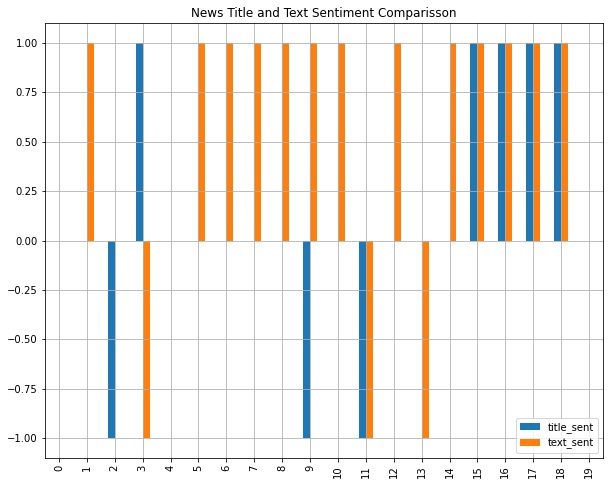

In [18]:
# Describe the Ethereum Sentiment
ethereum_en_df_2.plot(
    y=["title_sent", "text_sent"],
    kind="bar",
    title="News Title and Text Sentiment Comparisson",
    figsize=(10, 8),
    grid=True,
)

### Questions:

Q: Which coin had the highest mean positive score?

A: Eutherum coin has highest mean positive score

Q: Which coin had the highest compound score?

A: Bitcoinm has  highest compound score

Q. Which coin had the highest positive score?

A: Eutherum coin has highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package reuters to
[nltk_data]     C:\Users\KetanHina\AppData\Roaming\nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KetanHina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KetanHina\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KetanHina\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_addons = {'said', 'sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also'}

In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Remove the punctuation from text
    # Create a tokenized list of the words
    # Lemmatize words into root words
    # Convert the words to lowercase
    # Remove the stop words
    
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens


In [22]:
# Create a new tokens column for Bitcoin
# get all raw stories from bitcoin news
raw_stories = []
for article in bitcoin_news_en['articles']: 
    raw_stories.append(article['content'])

sentence_tokenized = [sent_tokenize(i) for i in raw_stories]
len(sentence_tokenized[0])

word_tokenized = []

for story in sentence_tokenized:
    # get all for each article, which is already sentence tokenized
    words = []
    for sent in story:
        # words = words + word_tokenize(sent)
        words = words + tokenizer(sent)

    # append all words for each article to the word_tokenized list
    word_tokenized.append(words)
    
# Put everything into a DataFrame
bitcoin_tockens_df = pd.DataFrame({'raw_stories': raw_stories,
                             'sentence_tokenized': sentence_tokenized,
                             'word_tokenized': word_tokenized
                            })
bitcoin_en_df.head()

bitcoin_en_df_2 = pd.concat([bitcoin_en_df, bitcoin_tockens_df], axis=1, join='inner')
bitcoin_en_df_2.head()

,title,description,text,date,language,raw_stories,sentence_tokenized,word_tokenized
0,"NFTs don’t need crypto, but crypto needs NFTs",Spending millions for a digital work of art th...,Spending millions for a digital work of art th...,2021-03-13,en,Spending millions for a digital work of art th...,[Spending millions for a digital work of art t...,"[spending, million, digital, work, art, could,..."
1,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,en,NFTs (non-fungible tokens) — or scarce digital...,[NFTs (non-fungible tokens) — or scarce digita...,"[nfts, nonfungible, token, scarce, digital, co..."
2,Coinbase fined $6.5 million over cryptocurrenc...,Regulators have fined Coinbase $6.5 million fo...,Coinbase is paying the price for its earlier c...,2021-03-21,en,Coinbase is paying the price for its earlier c...,[Coinbase is paying the price for its earlier ...,"[coinbase, paying, price, earlier, cryptocurre..."
3,Crypto social network BitClout arrives with a ...,While much of the recent wave of relentless hy...,While much of the recent wave of relentless hy...,2021-03-23,en,While much of the recent wave of relentless hy...,[While much of the recent wave of relentless h...,"[much, recent, wave, relentless, hype, around,..."
4,Bitfinex launches cryptocurrency payment gatew...,Cryptocurrency exchange company Bitfinex is la...,Cryptocurrency exchange company Bitfinex is la...,2021-03-04,en,Cryptocurrency exchange company Bitfinex is la...,[Cryptocurrency exchange company Bitfinex is l...,"[cryptocurrency, exchange, company, bitfinex, ..."


In [23]:
# Create a new tokens column for Ethereum
# get all raw stories from ethereum news
raw_stories_eth = []
for article in ethereum_news_en['articles']: 
    raw_stories_eth.append(article['content'])

sentence_tokenized_eth = [sent_tokenize(i) for i in raw_stories_eth]

word_tokenized_eth = []

for story in sentence_tokenized_eth:
    # get all for each article, which is already sentence tokenized
    words_eth = []
    for sent in story:
        # words = words + word_tokenize(sent)
        words_eth = words_eth + tokenizer(sent)

    # append all words for each article to the word_tokenized list
    word_tokenized_eth.append(words_eth)
    
# Put everything into a DataFrame
ethereum_tockens_df = pd.DataFrame({'raw_stories': raw_stories_eth,
                             'sentence_tokenized': sentence_tokenized_eth,
                             'word_tokenized': word_tokenized_eth
                            })
ethereum_en_df.head()

ethereum_en_df_2 = pd.concat([ethereum_en_df, ethereum_tockens_df], axis=1, join='inner')
ethereum_en_df_2.head()

,title,description,text,date,language,raw_stories,sentence_tokenized,word_tokenized
0,The climate controversy swirling around NFTs,"Most NFTs are bought and sold with Ethereum, a...",Famed auction house Christies just sold its fi...,2021-03-15,en,Famed auction house Christies just sold its fi...,[Famed auction house Christies just sold its f...,"[famed, auction, house, christies, sold, first..."
1,"If you haven’t followed NFTs, here’s why you s...","Digital content has value, and crypto collecto...",NFTs (non-fungible tokens) — or scarce digital...,2021-02-27,en,NFTs (non-fungible tokens) — or scarce digital...,[NFTs (non-fungible tokens) — or scarce digita...,"[nfts, nonfungible, token, scarce, digital, co..."
2,$5.7M stolen in Roll crypto heist after hot wa...,A security breach at cryptocurrency platform R...,A security breach at cryptocurrency platform R...,2021-03-16,en,A security breach at cryptocurrency platform R...,[A security breach at cryptocurrency platform ...,"[security, breach, cryptocurrency, platform, r..."
3,"A beginner's guide to NFTs, the crypto potenti...",Here's everything you need to know about non-f...,Here's everything you need to know about non-f...,2021-03-16,en,Here's everything you need to know about non-f...,[Here's everything you need to know about non-...,"[heres, everything, need, know, nonfungible, t..."
4,"NFTs don’t need crypto, but crypto needs NFTs",Spending millions for a digital work of art th...,Spending millions for a digital work of art th...,2021-03-13,en,Spending millions for a digital work of art th...,[Spending millions for a digital work of art t...,"[spending, million, digital, work, art, could,..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [24]:
from collections import Counter
from nltk import ngrams

In [72]:
# Generate the Bitcoin N-grams where N=2
bitcoin__all_text = []
for article in bitcoin_news_en['articles']:
    bitcoin__all_text.append(article['content'])

big_string = ' '.join(bitcoin__all_text)
processed = tokenizer(big_string)
# print(processed)

bigram_counts = Counter(ngrams(processed, n=2))
print(dict(bigram_counts))



{('spending', 'million'): 1, ('million', 'digital'): 1, ('digital', 'work'): 1, ('work', 'art'): 1, ('art', 'could'): 1, ('could', 'screenshotted'): 1, ('screenshotted', 'feel'): 1, ('feel', 'similar'): 1, ('similar', 'traipsing'): 1, ('traipsing', 'around'): 1, ('around', 'strip'): 1, ('strip', 'concrete'): 1, ('concrete', 'tourist'): 1, ('tourist', 'activity'): 1, ('activity', 'optic'): 1, ('optic', 'dont'): 1, ('dont', 'make'): 1, ('make', 'immediate'): 1, ('immediate', 'sense'): 1, ('sense', 'hardly'): 1, ('hardly', 'char'): 1, ('char', 'nfts'): 1, ('nfts', 'nonfungible'): 2, ('nonfungible', 'token'): 3, ('token', 'scarce'): 1, ('scarce', 'digital'): 1, ('digital', 'content'): 1, ('content', 'represented'): 1, ('represented', 'token'): 1, ('token', 'driving'): 1, ('driving', 'new'): 1, ('new', 'wave'): 1, ('wave', 'crypto'): 1, ('crypto', 'adoptionthanks'): 1, ('adoptionthanks', 'ethereum'): 1, ('ethereum', 'blockchain'): 1, ('blockchain', 'artist'): 1, ('artist', 'gaming'): 1, ('g

In [73]:
# Generate the Ethereum N-grams where N=2
ethereum__all_text = []
for article in bitcoin_news_en['articles']:
    ethereum__all_text.append(article['content'])

eth_big_string = ' '.join(ethereum__all_text)
eth_processed = tokenizer(eth_big_string)
# print(processed)

eth_bigram_counts = Counter(ngrams(eth_processed, n=2))
print(dict(eth_bigram_counts))

{('spending', 'million'): 1, ('million', 'digital'): 1, ('digital', 'work'): 1, ('work', 'art'): 1, ('art', 'could'): 1, ('could', 'screenshotted'): 1, ('screenshotted', 'feel'): 1, ('feel', 'similar'): 1, ('similar', 'traipsing'): 1, ('traipsing', 'around'): 1, ('around', 'strip'): 1, ('strip', 'concrete'): 1, ('concrete', 'tourist'): 1, ('tourist', 'activity'): 1, ('activity', 'optic'): 1, ('optic', 'dont'): 1, ('dont', 'make'): 1, ('make', 'immediate'): 1, ('immediate', 'sense'): 1, ('sense', 'hardly'): 1, ('hardly', 'char'): 1, ('char', 'nfts'): 1, ('nfts', 'nonfungible'): 2, ('nonfungible', 'token'): 3, ('token', 'scarce'): 1, ('scarce', 'digital'): 1, ('digital', 'content'): 1, ('content', 'represented'): 1, ('represented', 'token'): 1, ('token', 'driving'): 1, ('driving', 'new'): 1, ('new', 'wave'): 1, ('wave', 'crypto'): 1, ('crypto', 'adoptionthanks'): 1, ('adoptionthanks', 'ethereum'): 1, ('ethereum', 'blockchain'): 1, ('blockchain', 'artist'): 1, ('artist', 'gaming'): 1, ('g

In [81]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    big_string = ' '.join(tokens)
    processed = tokenizer(big_string)
    bigrams = ngrams(processed, n=N)
#     top_10 = dict(Counter(bigrams).most_common(10))
    return dict(bigram_counts.most_common(10))
    

In [80]:
# Use token_count to get the top 10 words for Bitcoin
bitcoin_top_10 = token_count(bitcoin__all_text)
bitcoin_top_10

{('nonfungible', 'token'): 3,
 ('char', 'reuters'): 3,
 ('nfts', 'nonfungible'): 2,
 ('emerging', 'asset'): 2,
 ('asset', 'class'): 2,
 ('char', 'london'): 2,
 ('london', 'reuters'): 2,
 ('york', 'reuters'): 2,
 ('reuters', 'breakingviews'): 2,
 ('billion', 'dollar'): 2}

In [82]:
# Use token_count to get the top 10 words for Ethereum

ethereum_top_10 = token_count(ethereum__all_text)
ethereum_top_10


{('nonfungible', 'token'): 3,
 ('char', 'reuters'): 3,
 ('nfts', 'nonfungible'): 2,
 ('emerging', 'asset'): 2,
 ('asset', 'class'): 2,
 ('char', 'london'): 2,
 ('london', 'reuters'): 2,
 ('york', 'reuters'): 2,
 ('reuters', 'breakingviews'): 2,
 ('billion', 'dollar'): 2}

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [86]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]



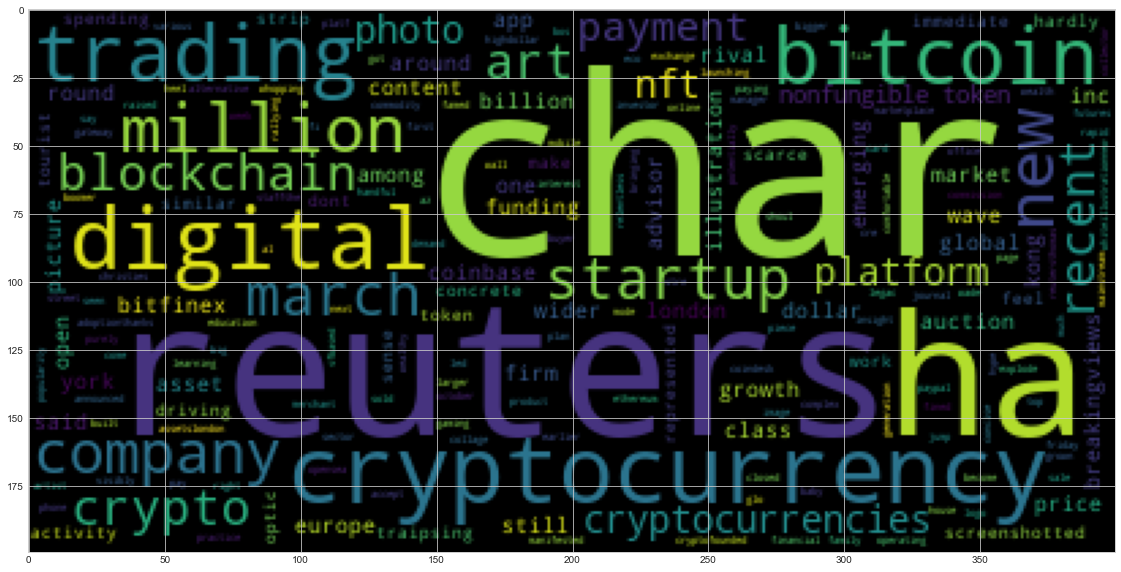

In [96]:
# Generate the Bitcoin word cloud
big_string = ' '.join(bitcoin__all_text)

input_text = tokenizer(big_string)
input_text = ' '.join(input_text)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

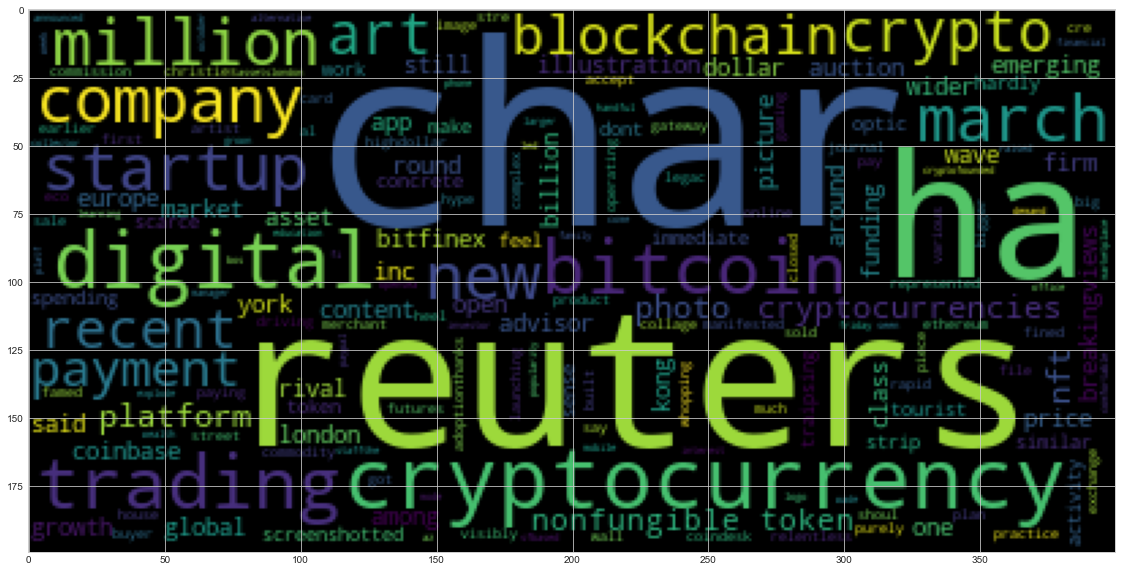

In [97]:
# Generate the Ethereum word cloud
big_string = ' '.join(ethereum__all_text)

input_text = tokenizer(big_string)
input_text = ' '.join(input_text)

wc = WordCloud().generate(input_text)
plt.imshow(wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [107]:
import spacy
from spacy import displacy

In [108]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [109]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [110]:
# Concatenate all of the Bitcoin text together
bitcoin__all_text = []
for article in bitcoin_news_en['articles']:
    bitcoin__all_text.append(article['content'])

big_string = ' '.join(bitcoin__all_text)

In [115]:
# Run the NER processor on all of the text
doc = nlp(big_string)

# Add a title to the document
for ent in doc.ents:
    print(ent.text, ent.label_)

millions CARDINAL
Ethereum ORG
the Wall Street Journal ORG
the Commodity Futures Trading Commission ORG
Coinbase ORG
$6.5 million MONEY
Bitfinex ORG
Bitfinex ORG
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Europe LOC
Friday DATE
$26 million MONEY
2018 DATE
SF GPE
LONDON GPE
March 2 DATE
LONDON GPE
Reuters ORG
NFT ORG
recent weeks DATE
Reuters ORG
PayPal ORG
October 16, 2017 DATE
REUTERS/ ORG
Thomas White/Illustration PERSON
NEW YORK GPE
Reuters Breakingviews ORG
LONDON GPE
Reuters ORG
billions of dollars MONEY
five CARDINAL
U.S. GPE
Europe LOC
Asia LOC
Currencies WORK_OF_ART
5% PERCENT
Wednesday DATE
50,000 MONEY
space.</li><li CARDINAL
more than $200 MONEY
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
24, 2021 DATE
Entrepreneur ORG
Bitcoin PERSON
Reuters ORG
Meitu ORG
Beijing GPE
China GPE
March 22, 2017 DATE
March 22 DATE
Jason Lee PERSON
HONG KONG GPE
Reuters Breakingviews ORG
LONDON GPE
NEW YORK GPE
Reuters ORG
Tesla Inc PERSON
MicroStrategy Inc ORG
bill

In [116]:
# Render the visualization
displacy.render(doc, style='ent')

In [117]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['SF', 'LONDON', 'LONDON', 'NEW YORK', 'LONDON', 'U.S.', 'Beijing', 'China', 'HONG KONG', 'LONDON', 'NEW YORK', 'HONG KONG']


---

### Ethereum NER

In [118]:
# Concatenate all of the Ethereum text together
ethereum_all_text = []
for article in ethereum_news_en['articles']:
    ethereum_all_text.append(article['content'])

big_string = ' '.join(ethereum_all_text)

In [124]:
# Run the NER processor on all of the text
doc = nlp(big_string)

# Add a title to the document
for ent in doc.ents:
    print(ent.text, ent.label_)

Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Ethereum ORG
about $5.7 million MONEY
millions CARDINAL
NFT ORG
recent weeks DATE
Bitfinex ORG
Bitfinex ORG
MetaMask PRODUCT
one CARDINAL
Ethereum ORG
September 2020 DATE
millions of dollars MONEY
Google ORG
Reuters ORG
BUCHAREST PERSON
Reuters ORG
this month DATE
NFT ORG
these days DATE
Pussy Riot PERSON
Nadya Tolokonnikova PERSON
one CARDINAL
five CARDINAL
U.S. GPE
Europe LOC
Asia LOC
Currencies WORK_OF_ART
these days DATE
Kings PERSON
NBA ORG
millions CARDINAL
Terry Crewscertainly PERSON
NFL ORG
Digital ORG
Grayscale Investments ORG
Wednesday DATE
five CARDINAL
13 CARDINAL
Reuters ORG
Monday DATE
Reuters ORG
Monday DATE
March 29 DATE
Reuters ORG
Monday DATE
Entrepreneur ORG


In [125]:
# Render the visualization
displacy.render(doc, style='ent')

In [126]:
# List all Entities
print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])

['U.S.']


---